Análisis Exploratorio de Datos

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#librerias utilisadas


In [37]:

file_path = "C:/Users/yanin/OneDrive/Desktop/proyecto 2/archivos/internet.xlsx"
# Ruta del archivo subido
sheets = pd.read_excel("C:/Users/yanin/OneDrive/Desktop/proyecto 2/archivos/internet.xlsx", sheet_name=None)  # Cargar todas las hojas


# Cargar el archivo Excel
df = pd.ExcelFile(file_path)

# Mostrar los nombres de las hojas
df.sheet_names

for sheet_name, df in sheets.items():
    print(f"\n===== Contenido de la hoja: {sheet_name} =====")
   






===== Contenido de la hoja: Acc_vel_loc_sinrangos =====

===== Contenido de la hoja: Velocidad_sin_Rangos =====

===== Contenido de la hoja: Accesos_tecnologia_localidad =====

===== Contenido de la hoja: Velocidad % por prov =====

===== Contenido de la hoja: Totales VMD =====

===== Contenido de la hoja: Totales Accesos Por Tecnología =====

===== Contenido de la hoja: Accesos Por Tecnología =====

===== Contenido de la hoja: Penetración-poblacion =====

===== Contenido de la hoja: Penetracion-hogares =====

===== Contenido de la hoja: Penetracion-totales =====

===== Contenido de la hoja: Totales Accesos por rango =====

===== Contenido de la hoja: Accesos por rangos =====

===== Contenido de la hoja: Dial-BAf =====

===== Contenido de la hoja: Totales Dial-BAf =====

===== Contenido de la hoja: Ingresos  =====


El archivo contiene las siguientes hojas: 1. **Acc_vel_loc_sinrangos** 2. **Velocidad_sin_Rangos** 3. **Accesos_tecnologia_localidad** 4. **Velocidad % por prov** 5. **Totales VMD** 6. **Totales Accesos por Tecnología** 7. **Accesos por Tecnología** 8. **Penetración-población** 9. **Penetración-hogares** 10. **Penetración-totales** 11. **Totales Accesos por rango** 12. **Accesos por rangos** 13. **Dial-BAf** 14. **Totales Dial-BAf** 15. **Ingresos** 

las hojas que elejimos para analizar son las sig: 
**Accesos_tecnologia_localidad**: Puede brindar información sobre el acceso a internet por tecnología en distintas localidades. - 
**Velocidad % por prov**: Es útil para analizar la distribución de velocidades de internet por provincia. - 
**Penetracion-hogares / Penetracion-totales**: Indicadores de cuántos hogares y usuarios tienen acceso a internet. - 
**Totales Accesos Por Tecnología** y **Accesos Por Tecnología**: Para ver la evolución del acceso a internet según la tecnología utilizada. 
- **Ingresos**: Puede ser relevante si deseas analizar la relación entre el acceso a internet y los ingresos. 

In [38]:


# Lista de hojas que queremos analizar
sheets_to_analyze = [
    "Accesos_tecnologia_localidad",
    "Velocidad % por prov",
    "Penetracion-hogares",
    "Penetracion-totales",
    "Totales Accesos Por Tecnología",
    "Accesos Por Tecnología",
    "Ingresos "

]

# Cargar todas las hojas en un diccionario de DataFrames
xls = pd.ExcelFile(file_path)
dfs = {sheet: xls.parse(sheet) for sheet in sheets_to_analyze}

# Mostrar las primeras filas de cada hoja
for sheet, df in dfs.items():
    print(f"\n📊 **Hoja: {sheet}**")
    print(df.head())  # Muestra las primeras 5 filas
    print("\n" + "-"*50)  # Separador



📊 **Hoja: Accesos_tecnologia_localidad**
      Provincia     Partido   Localidad    Tecnologia Link Indec  Accesos
0  BUENOS AIRES  25 de Mayo  25 de Mayo          ADSL    6854100    755.0
1  BUENOS AIRES  25 de Mayo  25 de Mayo    CABLEMODEM    6854100   4600.0
2  BUENOS AIRES  25 de Mayo  25 de Mayo  FIBRA OPTICA    6854100      2.0
3  BUENOS AIRES  25 de Mayo  25 de Mayo     SATELITAL    6854100    742.0
4  BUENOS AIRES  25 de Mayo  25 de Mayo      WIRELESS    6854100    727.0

--------------------------------------------------

📊 **Hoja: Velocidad % por prov**
    Año  Trimestre        Provincia  Mbps (Media de bajada)
0  2024          2     Buenos Aires                  157.41
1  2024          2  Capital Federal                  233.01
2  2024          2        Catamarca                   97.38
3  2024          2            Chaco                  107.76
4  2024          2           Chubut                   21.67

--------------------------------------------------

📊 **Hoja: Penet

1-analisis Accesos tecnologia localidad

In [39]:
# Seleccionar la hoja "Accesos_tecnologia_localidad"
sheet_name = "Accesos_tecnologia_localidad"
df = dfs[sheet_name]

# Análisis inicial
analysis_results = {
    "head": df.head(),  # Primeras filas
    "info": df.info(),  # Información general
    "missing_values": df.isnull().sum(),  # Valores nulos
    "duplicates": df.duplicated().sum(),  # Duplicados
    "describe": df.describe()  # Estadísticas generales
}

analysis_results


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7753 entries, 0 to 7752
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Provincia   7753 non-null   object 
 1   Partido     7753 non-null   object 
 2   Localidad   7753 non-null   object 
 3   Tecnologia  7753 non-null   object 
 4   Link Indec  7753 non-null   object 
 5   Accesos     7747 non-null   float64
dtypes: float64(1), object(5)
memory usage: 363.6+ KB


{'head':       Provincia     Partido   Localidad    Tecnologia Link Indec  Accesos
 0  BUENOS AIRES  25 de Mayo  25 de Mayo          ADSL    6854100    755.0
 1  BUENOS AIRES  25 de Mayo  25 de Mayo    CABLEMODEM    6854100   4600.0
 2  BUENOS AIRES  25 de Mayo  25 de Mayo  FIBRA OPTICA    6854100      2.0
 3  BUENOS AIRES  25 de Mayo  25 de Mayo     SATELITAL    6854100    742.0
 4  BUENOS AIRES  25 de Mayo  25 de Mayo      WIRELESS    6854100    727.0,
 'info': None,
 'missing_values': Provincia     0
 Partido       0
 Localidad     0
 Tecnologia    0
 Link Indec    0
 Accesos       6
 dtype: int64,
 'duplicates': np.int64(0),
 'describe':             Accesos
 count  7.747000e+03
 mean   1.491688e+03
 std    1.520174e+04
 min    0.000000e+00
 25%    3.000000e+00
 50%    5.900000e+01
 75%    4.005000e+02
 max    1.144781e+06}

esta es la informacion que contine: 
-Las columnas incluyen información sobre la provincia, partido, localidad, tipo de tecnología utilizada, un enlace a datos del INDEC y la cantidad de accesos a internet
-El dataset contiene 7,753 registros y 6 columnas
-el dataset solo contiene 6 nulos 
-presencia de valores atipicos: puede darse en zona urbanas o rurales
-el minimo lo dice que hay lugares que no hay internet
-el maximo sugiere que hay grandes cuidades que la poblacion utiliza internet
- la Mediana : lo que sugiere que la mayoría de las localidades tienen un número bajo de accesos.
-la Media :  lo que indica que hay algunas localidades con valores extremadamente altos que influyen en la media.
-Desviación estándar:  lo que sugiere una gran variabilidad en los accesos entre localidades.
-El 75% de las localidades: tienen hasta 400 accesos, lo que significa que la mayoría de los accesos están concentrados en pocas localidades con valores muy altos

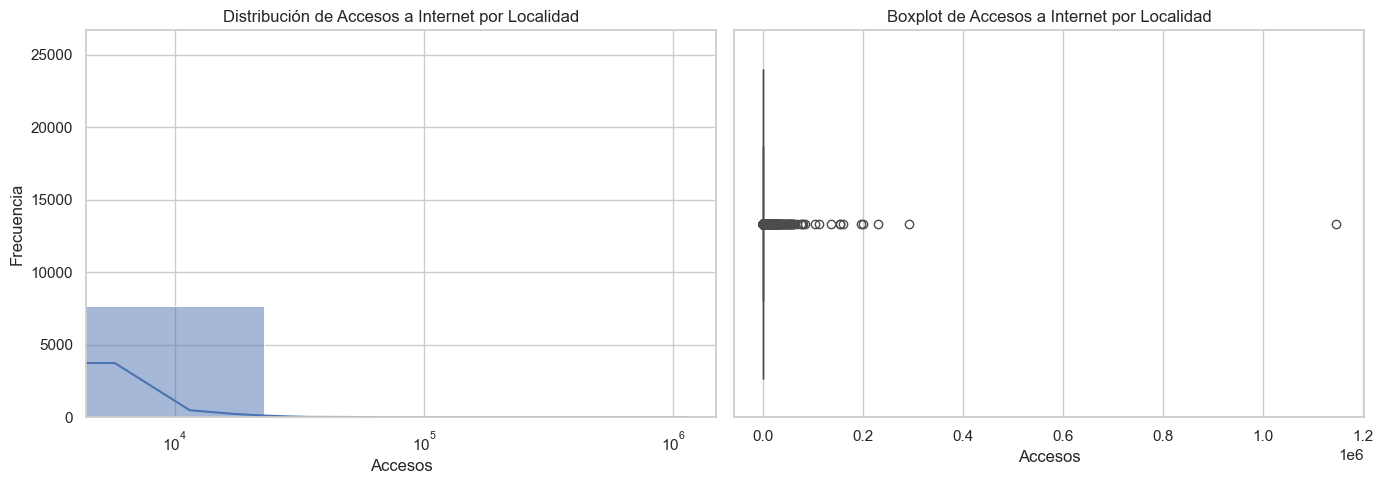

In [40]:
# Configurar el estilo de los gráficos
sns.set(style="whitegrid")
# Crear una figura con dos subgráficos: histograma y boxplot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
# Histograma de "Accesos" (escala logarítmica para mejor visualización)
sns.histplot(df["Accesos"].dropna(), bins=50, kde=True, ax=axes[0])
axes[0].set_title("Distribución de Accesos a Internet por Localidad")
axes[0].set_xlabel("Accesos")
axes[0].set_ylabel("Frecuencia")
axes[0].set_xscale("log")  # Escala logarítmica para manejar valores extremos
# Boxplot de "Accesos"
sns.boxplot(x=df["Accesos"], ax=axes[1])
axes[1].set_title("Boxplot de Accesos a Internet por Localidad")
axes[1].set_xlabel("Accesos")
# Mostrar los gráficos
plt.tight_layout()
plt.show()

-en el primer grafico muestra la distribucion del acessos a internet por localidad muestra una alta concetracion en pocas localidades,con una disminución exponencial en la frecuencia de accesos a medida que aumenta el número de la localidad. Esto sugiere una brecha digital significativa entre las localidades con mayor y menor acceso a Internet.
-en el segundo grafico muestra diagrama de caja de los accesos a Internet por localidad.  
* Dispersión: Existe una gran dispersión en la cantidad de accesos a Internet entre las diferentes localidades, lo que sugiere una distribución desigual del acceso a Internet.
 * Valores atípicos: Se observan valores atípicos en el extremo superior, lo que indica que algunas localidades tienen una cantidad de accesos a Internet significativamente mayor que el resto.
 * Mediana: La mediana de los accesos a Internet se encuentra relativamente baja, lo que sugiere que la mayoría de las localidades tienen una cantidad de accesos a Internet inferior al promedio

2. Velocidad % por prov

In [41]:
# Cargar la hoja "Velocidad % por prov"
df = pd.read_excel(file_path, sheet_name="Velocidad % por prov")

# Mostrar las primeras filas del DataFrame
df.head()


,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2024,2,Buenos Aires,157.41
1,2024,2,Capital Federal,233.01
2,2024,2,Catamarca,97.38
3,2024,2,Chaco,107.76
4,2024,2,Chubut,21.67


mostramos las 5 filas . este datasep contiene las colunnas : años, trimestre, provincia, mbps

In [42]:


# Información general del DataFrame
info_df = df.info()

# Estadísticas descriptivas
desc_df = df.describe()

# Verificar valores nulos
missing_values = df.isnull().sum()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     1008 non-null   int64  
 1   Trimestre               1008 non-null   int64  
 2   Provincia               1008 non-null   object 
 3   Mbps (Media de bajada)  1008 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 31.6+ KB


esta es la informacion que contine: 
-Tiene 1008 filas y 4 columnas.
-No hay valores nulos en ninguna columna.
-Estadísticas Descriptivas:
*Velocidad de bajada media: 24.72 Mbps
*Mínima velocidad registrada: 2.57 Mbps
*Máxima velocidad registrada: 234.44 Mbps
*Se observa una alta dispersión en las velocidades (desviación estándar: 33.66 Mbps).

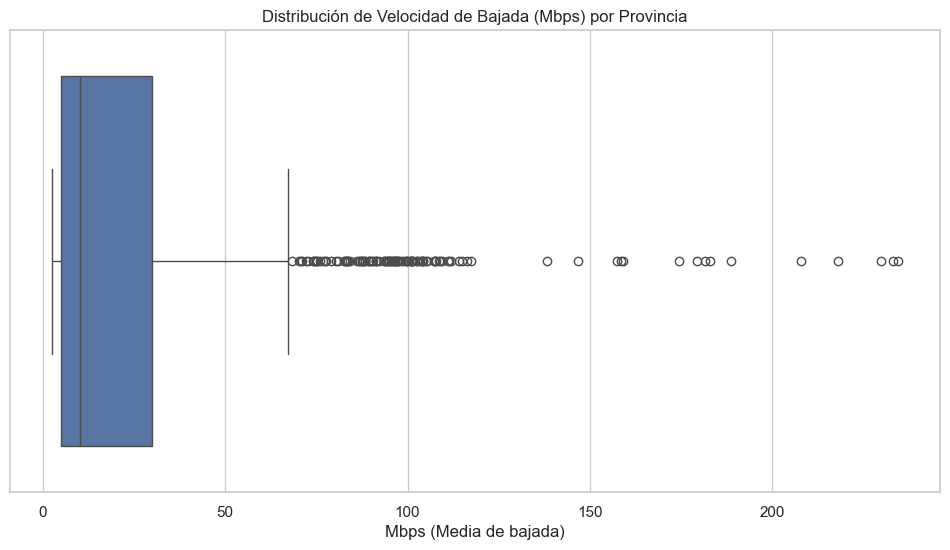

(None,
                Año    Trimestre  Mbps (Media de bajada)
 count  1008.000000  1008.000000             1008.000000
 mean   2018.761905     2.452381               24.720245
 std       3.039439     1.117574               33.660764
 min    2014.000000     1.000000                2.573729
 25%    2016.000000     1.000000                4.866698
 50%    2019.000000     2.000000               10.089315
 75%    2021.000000     3.000000               29.875292
 max    2024.000000     4.000000              234.440000,
 Año                       0
 Trimestre                 0
 Provincia                 0
 Mbps (Media de bajada)    0
 dtype: int64)

In [43]:
# Visualización de distribución de velocidad por provincia
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Mbps (Media de bajada)")
plt.title("Distribución de Velocidad de Bajada (Mbps) por Provincia")
plt.xlabel("Mbps (Media de bajada)")
plt.show()

info_df, desc_df, missing_values


En este grafico se observan valores atípicos, lo que indica que algunas provincias tienen velocidades mucho más altas que otras

C:\Users\yanin\AppData\Local\Temp\ipykernel_13352\1059847331.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x="Año", y="Mbps (Media de bajada)", marker="o", ci=None)


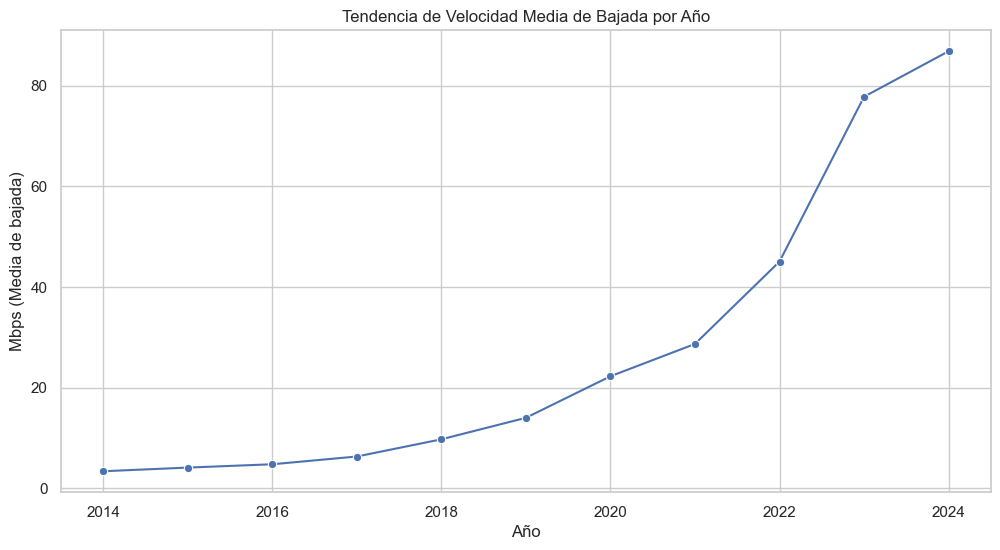

In [44]:
#  Tendencia de velocidad media a lo largo del tiempo
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Año", y="Mbps (Media de bajada)", marker="o", ci=None)
plt.title("Tendencia de Velocidad Media de Bajada por Año")
plt.ylabel("Mbps (Media de bajada)")
plt.xlabel("Año")
plt.grid(True)
plt.show()

Muestra cómo ha evolucionado la velocidad media de bajada por año.

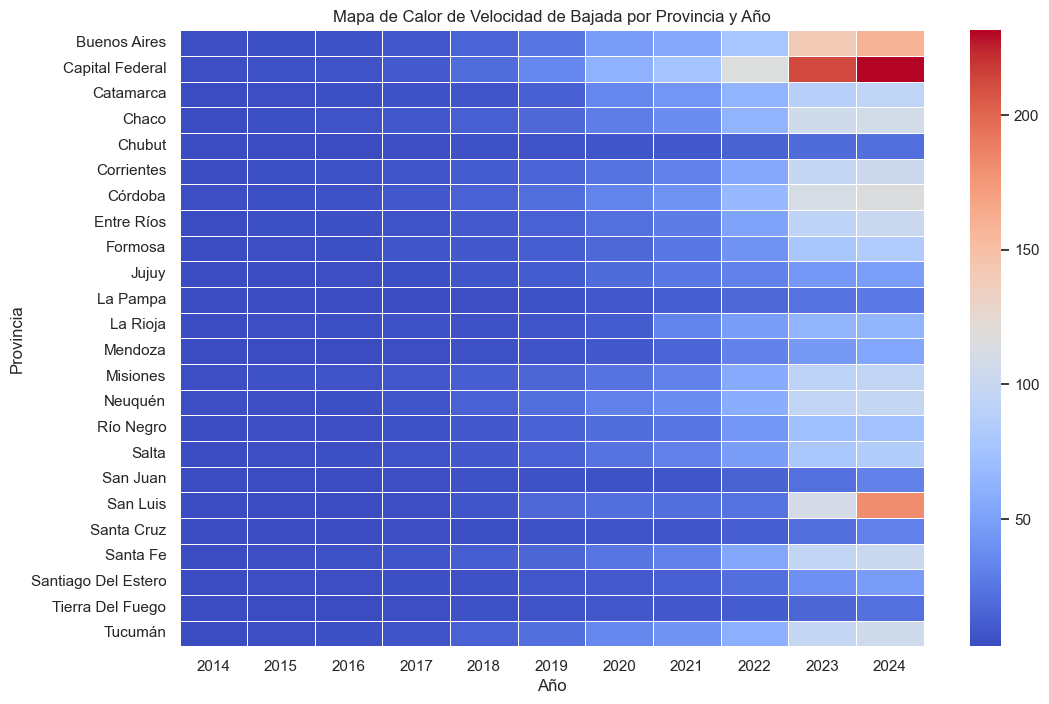

In [45]:
#  Mapa de calor de velocidad por provincia y año
pivot_table = df.pivot_table(index="Provincia", columns="Año", values="Mbps (Media de bajada)", aggfunc="mean")

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap="coolwarm", linewidths=0.5, annot=False)
plt.title("Mapa de Calor de Velocidad de Bajada por Provincia y Año")
plt.xlabel("Año")
plt.ylabel("Provincia")
plt.show()

Permite visualizar las diferencias de velocidad entre provincias a lo largo del tiempo.

C:\Users\yanin\AppData\Local\Temp\ipykernel_13352\1693778404.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_provincias.values, y=top_provincias.index, palette="viridis")


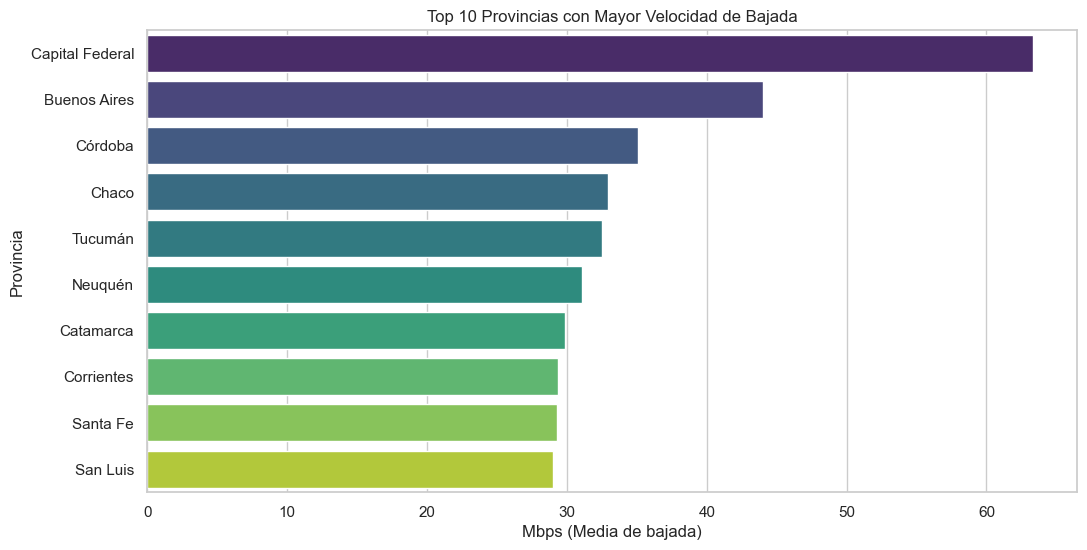

In [46]:


# Comparación de velocidad entre provincias (Top 10)
top_provincias = df.groupby("Provincia")["Mbps (Media de bajada)"].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_provincias.values, y=top_provincias.index, palette="viridis")
plt.title("Top 10 Provincias con Mayor Velocidad de Bajada")
plt.xlabel("Mbps (Media de bajada)")
plt.ylabel("Provincia")
plt.show()




Resalta las provincias con las velocidades más altas en promedio.

3- Penetracion-hogares

In [47]:

# Cargar la hoja "Penetracion-hogares"
df_hogares = pd.read_excel(file_path, sheet_name="Penetracion-hogares")

# Mostrar las primeras filas para verificar la carga
df_hogares.head()


,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2024,2,Buenos Aires,79.84
1,2024,2,Capital Federal,116.37
2,2024,2,Catamarca,68.81
3,2024,2,Chaco,44.06
4,2024,2,Chubut,86.33


cargo el datasep y muestro los primeros 5


In [48]:
# Información general del DataFrame
info_hogares = df_hogares.info()

# Estadísticas descriptivas
desc_hogares = df_hogares.describe()

# Verificar valores nulos
missing_values_hogares = df_hogares.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           1000 non-null   int64  
 1   Trimestre                     1000 non-null   int64  
 2   Provincia                     1000 non-null   object 
 3   Accesos por cada 100 hogares  1000 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 31.4+ KB


en este datasep:
-las columnas son año, trimestre, provincia y acesso cada 100 hogares
-1000 filas y 4 columnas.
-No hay valores nulos en ninguna columna.
-no hay valores duplicado
-Estadísticas Descriptivas:

*Promedio de accesos: 52.79 por cada 100 hogares.
*Mínimo: 9.51 accesos por cada 100 hogares.
*Máximo: 124.06 accesos por cada 100 hogares.
*Alta dispersión: Desviación estándar de 24.13.

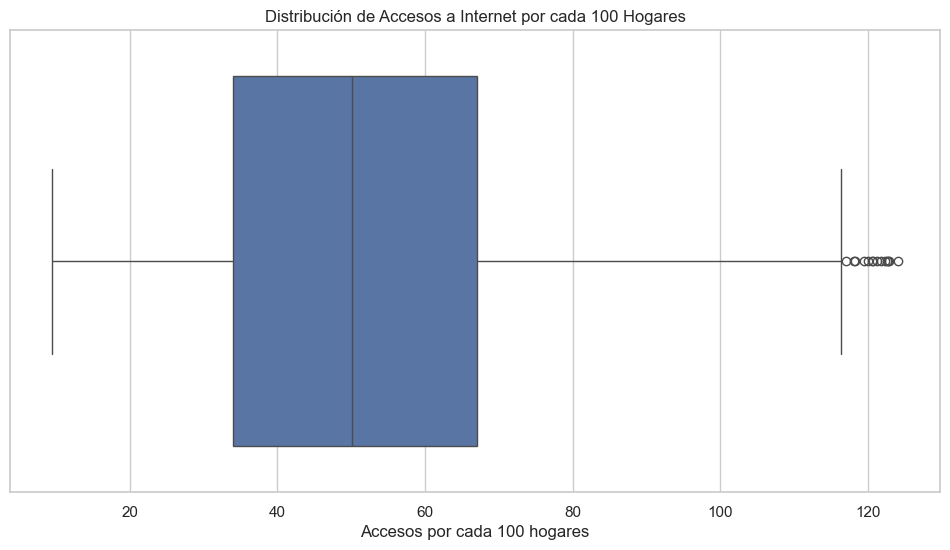

(None,
                Año    Trimestre  Accesos por cada 100 hogares
 count  1000.000000  1000.000000                   1000.000000
 mean   2018.800000     2.464000                     52.794973
 std       3.021445     1.114426                     24.135063
 min    2014.000000     1.000000                      9.513970
 25%    2016.000000     1.000000                     33.957657
 50%    2019.000000     2.000000                     50.133004
 75%    2021.000000     3.000000                     67.010861
 max    2024.000000     4.000000                    124.061394,
 Año                             0
 Trimestre                       0
 Provincia                       0
 Accesos por cada 100 hogares    0
 dtype: int64)

In [49]:


# Visualización de la distribución de accesos a internet por provincia
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_hogares, x="Accesos por cada 100 hogares")
plt.title("Distribución de Accesos a Internet por cada 100 Hogares")
plt.xlabel("Accesos por cada 100 hogares")
plt.show()

info_hogares, desc_hogares, missing_values_hogares


Se observan valores atípicos, indicando provincias con accesos muy superiores al promedio.

C:\Users\yanin\AppData\Local\Temp\ipykernel_13352\3845087841.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_hogares, x="Año", y="Accesos por cada 100 hogares", marker="o", ci=None)


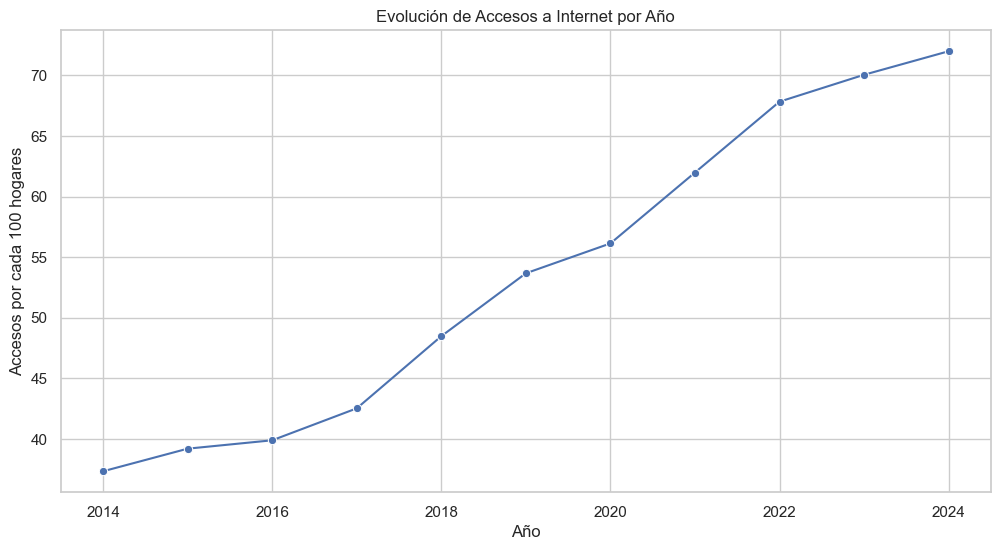

In [50]:
 # Evolución de la penetración de Internet a lo largo del tiempo

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_hogares, x="Año", y="Accesos por cada 100 hogares", marker="o", ci=None)
plt.title("Evolución de Accesos a Internet por Año")
plt.ylabel("Accesos por cada 100 hogares")
plt.xlabel("Año")
plt.grid(True)
plt.show()

Muestra cómo ha crecido la penetración de internet con el tiempo

C:\Users\yanin\AppData\Local\Temp\ipykernel_13352\4191391947.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_hogares.values, y=top_hogares.index, palette="viridis")


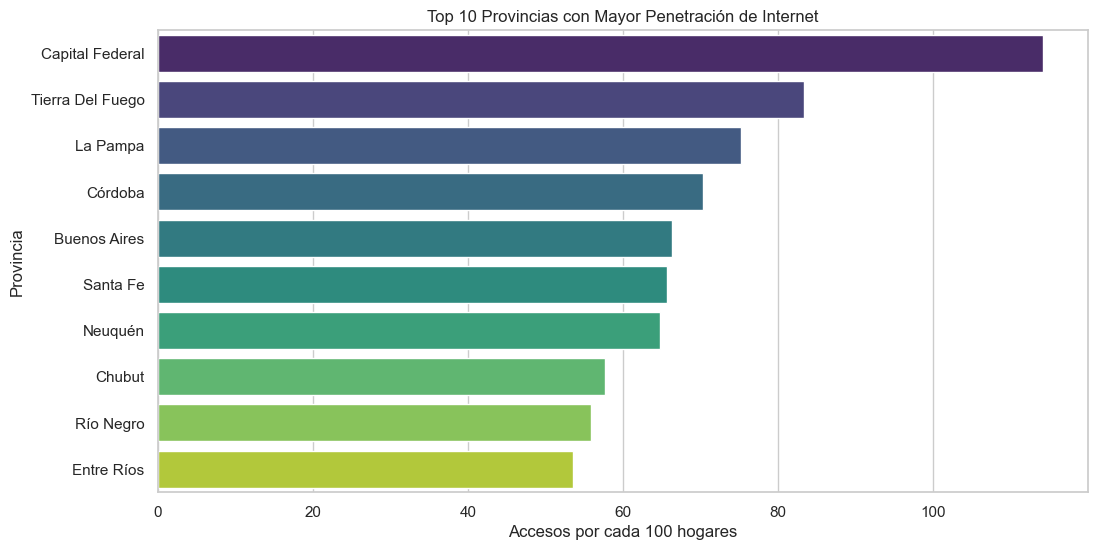

In [51]:
# Comparación de penetración por provincias (Top 10)
top_hogares = df_hogares.groupby("Provincia")["Accesos por cada 100 hogares"].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_hogares.values, y=top_hogares.index, palette="viridis")
plt.title("Top 10 Provincias con Mayor Penetración de Internet")
plt.xlabel("Accesos por cada 100 hogares")
plt.ylabel("Provincia")
plt.show()


Destaca las provincias con más accesos por cada 100 hogares en promedio.

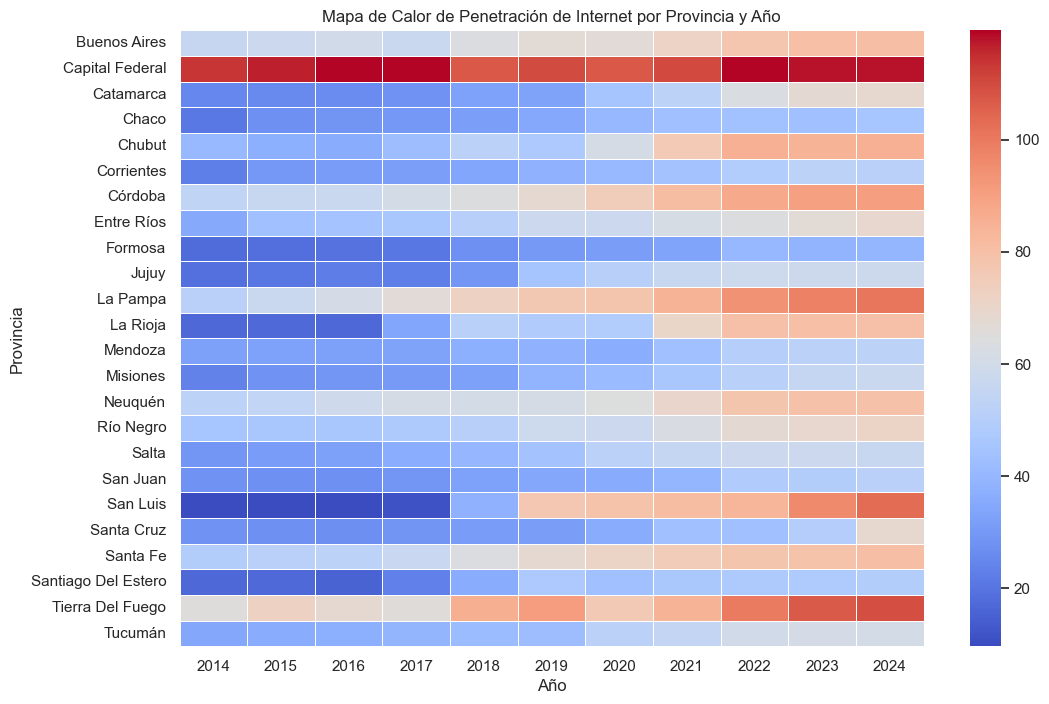

In [52]:
#  Mapa de calor de acceso por provincia y año
pivot_table_hogares = df_hogares.pivot_table(index="Provincia", columns="Año", values="Accesos por cada 100 hogares", aggfunc="mean")

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table_hogares, cmap="coolwarm", linewidths=0.5, annot=False)
plt.title("Mapa de Calor de Penetración de Internet por Provincia y Año")
plt.xlabel("Año")
plt.ylabel("Provincia")
plt.show()



Permite visualizar diferencias de acceso a internet entre provincias a lo largo del tiempo.



4-Penetracion-totales

In [53]:
# Cargar la hoja "Penetracion-totales"
df_totales = pd.read_excel(file_path, sheet_name="Penetracion-totales")

# Mostrar las primeras filas para entender su estructura
df_totales.head()


,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
0,2024,2,78.13,24.57,Abr-Jun 2024
1,2024,1,78.89,24.79,Ene-Mar 2024
2,2023,4,78.56,24.66,Oct-Dic 2023
3,2023,3,77.84,24.41,Jul-Sept 2023
4,2023,2,77.02,24.14,Abr-Jun 2023


cargo el datasep y muestro las 5 filas

In [54]:
# Información general del DataFrame
info_totales = df_totales.info()

# Estadísticas descriptivas
desc_totales = df_totales.describe()

# Verificar valores nulos
missing_values_totales = df_totales.isnull().sum()

# Verificar duplicados
duplicated_totales = df_totales.duplicated().sum()

info_totales, desc_totales, missing_values_totales, duplicated_totales


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           42 non-null     int64  
 1   Trimestre                     42 non-null     int64  
 2   Accesos por cada 100 hogares  42 non-null     float64
 3   Accesos por cada 100 hab      42 non-null     float64
 4   Periodo                       42 non-null     object 
dtypes: float64(2), int64(2), object(1)
memory usage: 1.8+ KB


(None,
                Año  Trimestre  Accesos por cada 100 hogares  \
 count    42.000000  42.000000                     42.000000   
 mean   2018.761905   2.452381                     63.201813   
 std       3.074756   1.130560                      9.950321   
 min    2014.000000   1.000000                     49.545821   
 25%    2016.000000   1.250000                     53.784644   
 50%    2019.000000   2.000000                     62.667764   
 75%    2021.000000   3.000000                     72.527011   
 max    2024.000000   4.000000                     78.890000   
 
        Accesos por cada 100 hab  
 count                 42.000000  
 mean                  19.574600  
 std                    3.268665  
 min                   15.050104  
 25%                   16.519507  
 50%                   19.395586  
 75%                   22.603664  
 max                   24.790000  ,
 Año                             0
 Trimestre                       0
 Accesos por cada 100 hogares

informacion sobre el archivo:
-contiene 5 columnas:Año: Año del registro,Trimestre,Accesos por cada 100 hogaresAccesos por cada 100 habitantes,Periodo.
-42 filas y 5 columnas.
-No hay valores nulos en ninguna columna. 
-No hay filas duplicadas. 
Estadísticas descriptivas:
*Años registrados: 2014 - 2024.
*Trimestres: Datos de los 4 trimestres de cada año.
*Accesos por cada 100 hogares:
Mínimo: 49.55
Máximo: 78.89
Media: 63.20
*Accesos por cada 100 habitantes:
Mínimo: 15.05
Máximo: 24.79
Media: 19.57

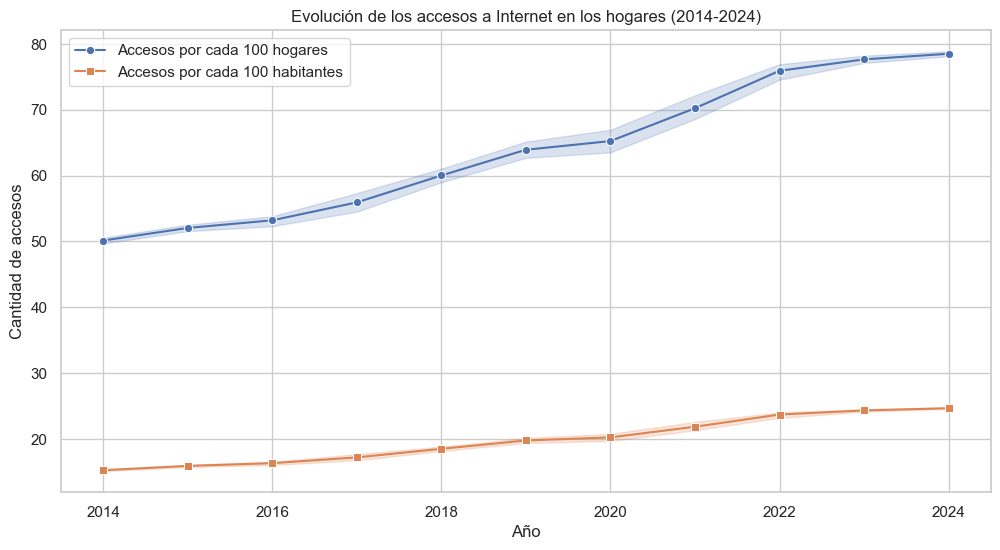

In [55]:

# Configuración de estilo
sns.set_style("whitegrid")

# Gráfico de evolución de accesos por cada 100 hogares
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_totales, x="Año", y="Accesos por cada 100 hogares", marker="o", label="Accesos por cada 100 hogares")
sns.lineplot(data=df_totales, x="Año", y="Accesos por cada 100 hab", marker="s", label="Accesos por cada 100 habitantes")

plt.title("Evolución de los accesos a Internet en los hogares (2014-2024)")
plt.xlabel("Año")
plt.ylabel("Cantidad de accesos")
plt.legend()
plt.show()


-La línea azul muestra los accesos por cada 100 hogares.
-La línea naranja representa los accesos por cada 100 habitantes.
-Se observa un crecimiento constante en ambos indicadores. 

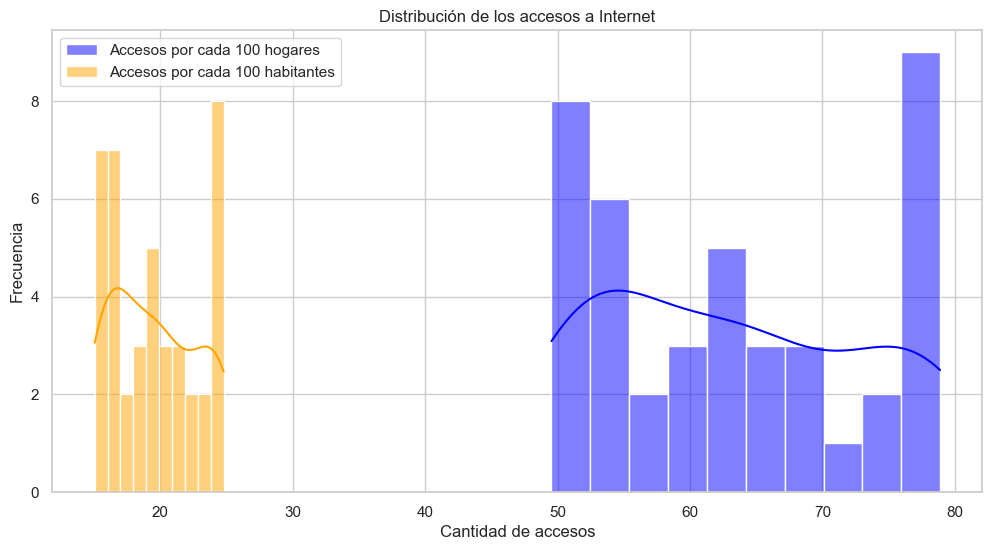

In [56]:
# Gráfico de distribución de accesos por cada 100 hogares y habitantes
plt.figure(figsize=(12, 6))
sns.histplot(df_totales["Accesos por cada 100 hogares"], bins=10, kde=True, color="blue", label="Accesos por cada 100 hogares")
sns.histplot(df_totales["Accesos por cada 100 hab"], bins=10, kde=True, color="orange", label="Accesos por cada 100 habitantes")

plt.title("Distribución de los accesos a Internet")
plt.xlabel("Cantidad de accesos")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()


-Distribución de accesos por cada 100 hogares (curva azul):Se observa una mayor concentración de valores en la parte superior del rango.
Esto indica que, en la mayoría de los periodos, los accesos por hogar han sido altos, con pocos valores bajos.

-Distribución de accesos por cada 100 habitantes (curva naranja):La distribución es más dispersa, lo que sugiere mayor variabilidad en los accesos por habitante.Aunque hay una tendencia creciente, algunos periodos tuvieron menos accesos por habitante.


-la penetración de Internet ha aumentado con el tiempo, especialmente en los hogares.
Sin embargo, el acceso por habitante ha tenido más fluctuaciones, posiblemente debido a cambios en la densidad poblacional o políticas de acceso a Internet

5- Totales Accesos Por Tecnología

In [57]:
# Cargar la hoja "Totales Accesos Por Tecnología"
df_tecnologia = pd.read_excel(file_path, sheet_name="Totales Accesos Por Tecnología")

# Mostrar las primeras filas para entender la estructura
df_tecnologia.head()


,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
0,2024,2,733491,5867504,4169958,593197,191957,11556107,Abr-Jun 2024
1,2024,1,774475,5986957,4015101,598682,257941,11633156,Ene-Mar 2024
2,2023,4,836390,6022532,3908183,585760,194796,11547661,Oct-Dic 2023
3,2023,3,897895,6018832,3708718,581436,200027,11406908,Jul-Sept 2023
4,2023,2,1006509,5997149,3463988,581823,202428,11251897,Abr-Jun 2023


este datasep tiene 9 columnas con diferente tecnologia , periodo ,año y trimestre

In [58]:
# Información general del DataFrame
info_tecnologia = df_tecnologia.info()

# Estadísticas descriptivas
desc_tecnologia = df_tecnologia.describe()

# Verificar valores nulos
missing_values_tecnologia = df_tecnologia.isnull().sum()

# Verificar duplicados
duplicated_tecnologia = df_tecnologia.duplicated().sum()

info_tecnologia, desc_tecnologia, missing_values_tecnologia, duplicated_tecnologia


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           42 non-null     int64 
 1   Trimestre     42 non-null     int64 
 2   ADSL          42 non-null     int64 
 3   Cablemodem    42 non-null     int64 
 4   Fibra óptica  42 non-null     int64 
 5   Wireless      42 non-null     int64 
 6   Otros         42 non-null     int64 
 7   Total         42 non-null     int64 
 8   Periodo       42 non-null     object
dtypes: int64(8), object(1)
memory usage: 3.1+ KB


(None,
                Año  Trimestre          ADSL    Cablemodem  Fibra óptica  \
 count    42.000000  42.000000  4.200000e+01  4.200000e+01  4.200000e+01   
 mean   2018.761905   2.452381  2.694844e+06  4.433906e+06  1.224694e+06   
 std       3.074756   1.130560  1.094347e+06  1.319783e+06  1.321136e+06   
 min    2014.000000   1.000000  7.334910e+05  2.407330e+06  1.391870e+05   
 25%    2016.000000   1.250000  1.730869e+06  3.146292e+06  1.719410e+05   
 50%    2019.000000   2.000000  3.061623e+06  4.535507e+06  6.989465e+05   
 75%    2021.000000   3.000000  3.713298e+06  5.857192e+06  1.945689e+06   
 max    2024.000000   4.000000  3.803024e+06  6.073426e+06  4.169958e+06   
 
             Wireless          Otros         Total  
 count      42.000000      42.000000  4.200000e+01  
 mean   304293.214286  158186.071429  8.815923e+06  
 std    203202.399993   82363.507846  1.733189e+06  
 min     70749.000000   54300.000000  6.398398e+06  
 25%     85390.500000   70430.000000  7.21

en este archivo:
-42 registros correspondientes a distintos trimestres desde 2014 hasta 2024.
-No hay valores nulos ni datos duplicados.
-ADSL: Ha disminuido con el tiempo, con un mínimo de 733,491 y un máximo de 3,803,024 accesos.
-Cablemódem: Ha sido una tecnología dominante, con valores entre 2,407,330 y 6,073,426 accesos.
-Fibra óptica: Ha crecido significativamente, con un mínimo de 139,187 y un máximo de 4,169,958 accesos.
-Wireless y Otros: Presentan menor cantidad de accesos y más variabilidad.
-Total de accesos: Varía entre 6.4M y 11.6M, con una tendencia creciente en los últimos años

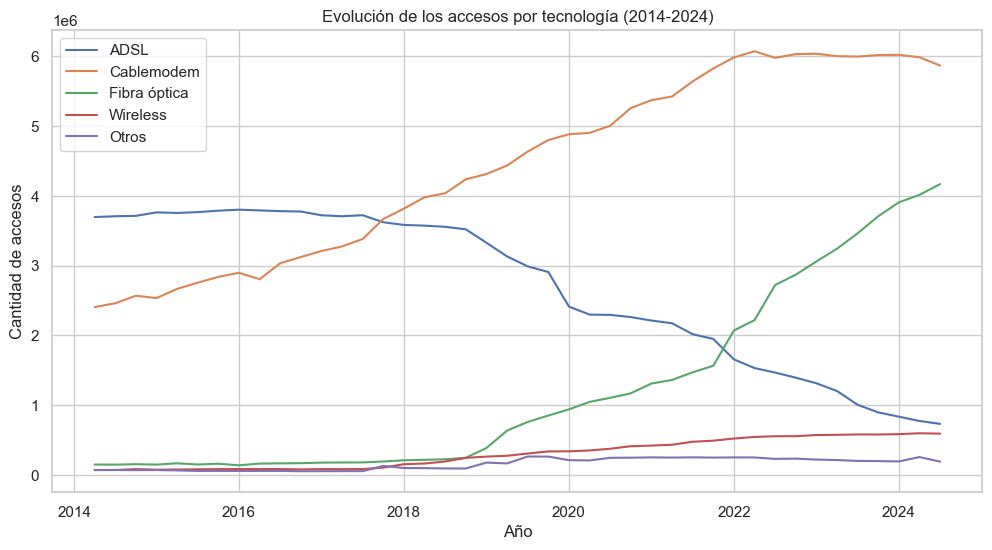

In [59]:


# Configurar el tamaño de los gráficos
plt.figure(figsize=(12, 6))

# Graficar evolución de accesos por tecnología a lo largo del tiempo
for col in ["ADSL", "Cablemodem", "Fibra óptica", "Wireless", "Otros"]:
    plt.plot(df_tecnologia["Año"] + df_tecnologia["Trimestre"] / 4, df_tecnologia[col], label=col)

# Personalizar el gráfico
plt.title("Evolución de los accesos por tecnología (2014-2024)")
plt.xlabel("Año")
plt.ylabel("Cantidad de accesos")
plt.legend()
plt.grid(True)
plt.show()


la evolución de los accesos a Internet por tecnología desde 2014 hasta 2024.

-ADSL ha ido en declive con el tiempo.
-Fibra óptica muestra un crecimiento acelerado, superando a otras tecnologías.
-Cablemódem se mantiene con una tendencia estable pero sin gran crecimiento.
-Wireless y Otros tienen menor impacto en el total de accesos.

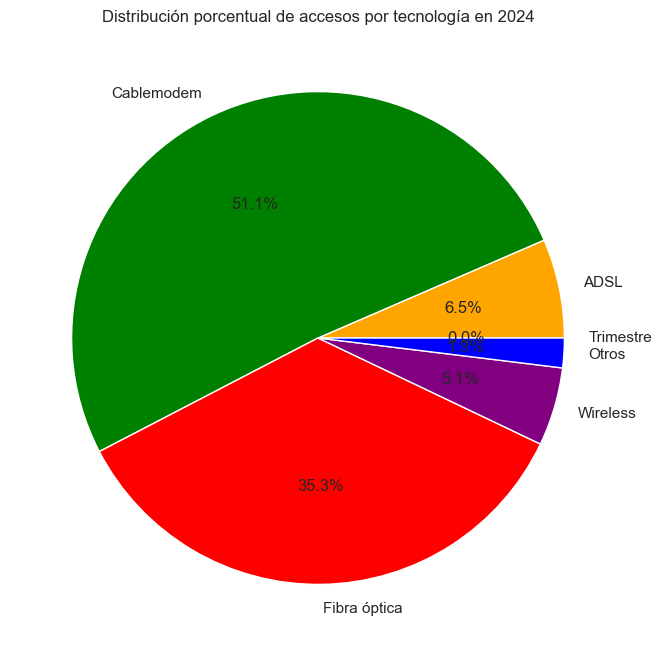

In [60]:
# Gráfico de participación porcentual de cada tecnología en el último año disponible (2024)
ultimo_anio = df_tecnologia[df_tecnologia["Año"] == 2024].iloc[:, 1:-2].sum()  # Excluir columnas de año y total

plt.figure(figsize=(8, 8))
plt.pie(ultimo_anio, labels=ultimo_anio.index, autopct='%1.1f%%', colors=["blue", "orange", "green", "red", "purple"])
plt.title("Distribución porcentual de accesos por tecnología en 2024")
plt.show()


-Fibra óptica domina el mercado, representando la mayor parte de los accesos.
-Cablemódem sigue siendo relevante, aunque con menor participación.
-ADSL ha disminuido considerablemente, reflejando su reemplazo por tecnologías más modernas.
-Wireless y Otros tienen una participación marginal.

6-Totales Accesos Por Tecnología

In [63]:
# Cargar nuevamente el archivo y mostrar las primeras filas

df_tecnologia = pd.read_excel(file_path, sheet_name="Totales Accesos Por Tecnología")
# Cargar la hoja "Penetracion-totales"

primeras_filas = df_tecnologia.head()

# Cantidad de datos (filas y columnas)
cantidad_datos = df_tecnologia.shape

primeras_filas, cantidad_datos


(    Año  Trimestre     ADSL  Cablemodem  Fibra óptica  Wireless   Otros  \
 0  2024          2   733491     5867504       4169958    593197  191957   
 1  2024          1   774475     5986957       4015101    598682  257941   
 2  2023          4   836390     6022532       3908183    585760  194796   
 3  2023          3   897895     6018832       3708718    581436  200027   
 4  2023          2  1006509     5997149       3463988    581823  202428   
 
       Total        Periodo  
 0  11556107   Abr-Jun 2024  
 1  11633156   Ene-Mar 2024  
 2  11547661   Oct-Dic 2023  
 3  11406908  Jul-Sept 2023  
 4  11251897   Abr-Jun 2023  ,
 (42, 9))

In [64]:
# Revisar valores nulos
nulos = df_tecnologia.isnull().sum()

# Revisar valores duplicados
duplicados = df_tecnologia.duplicated().sum()

# Revisar tipos de datos
tipos_datos = df_tecnologia.dtypes

# Estadísticas descriptivas
descripcion = df_tecnologia.describe()

nulos, duplicados, tipos_datos, descripcion


(Año             0
 Trimestre       0
 ADSL            0
 Cablemodem      0
 Fibra óptica    0
 Wireless        0
 Otros           0
 Total           0
 Periodo         0
 dtype: int64,
 np.int64(0),
 Año              int64
 Trimestre        int64
 ADSL             int64
 Cablemodem       int64
 Fibra óptica     int64
 Wireless         int64
 Otros            int64
 Total            int64
 Periodo         object
 dtype: object,
                Año  Trimestre          ADSL    Cablemodem  Fibra óptica  \
 count    42.000000  42.000000  4.200000e+01  4.200000e+01  4.200000e+01   
 mean   2018.761905   2.452381  2.694844e+06  4.433906e+06  1.224694e+06   
 std       3.074756   1.130560  1.094347e+06  1.319783e+06  1.321136e+06   
 min    2014.000000   1.000000  7.334910e+05  2.407330e+06  1.391870e+05   
 25%    2016.000000   1.250000  1.730869e+06  3.146292e+06  1.719410e+05   
 50%    2019.000000   2.000000  3.061623e+06  4.535507e+06  6.989465e+05   
 75%    2021.000000   3.000000  3.71

 -Valores nulos: No hay valores nulos en el dataset.
- Valores duplicados: No hay registros duplicados.

-Estadísticas descriptivas:

Año: Los datos van desde 2014 hasta 2024.
ADSL: El valor máximo de accesos fue 3.8 millones, pero su media está disminuyendo.
Fibra óptica: Su máximo es de 4.16 millones, mostrando un fuerte crecimiento.
Wireless y Otros: Tienen valores más bajos, pero con crecimiento.
Total de accesos: Oscila entre 6.3 millones y 11.6 millones, lo que sugiere un mercado en expansión.
s. 🚀

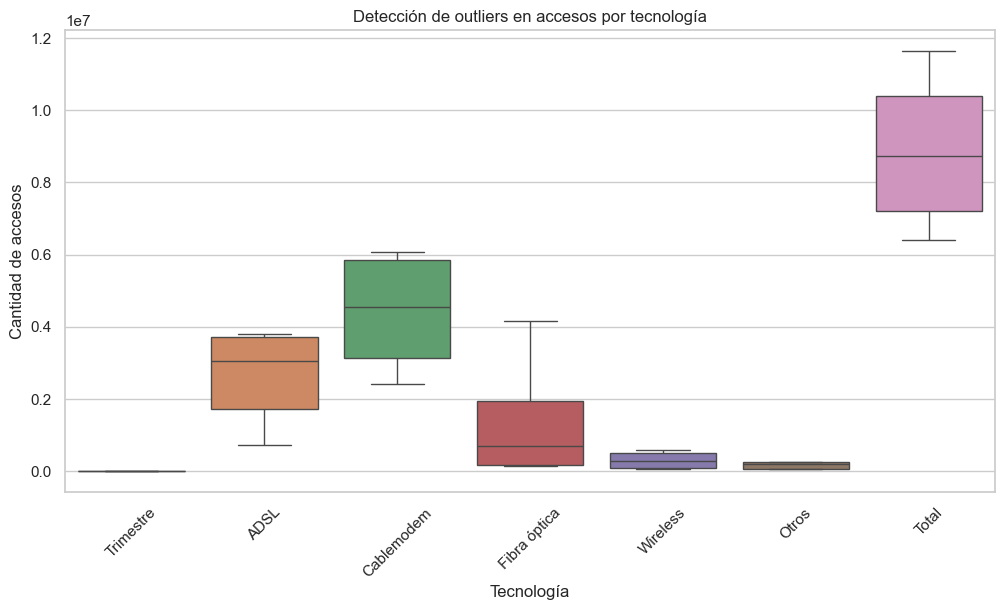

In [67]:
# Gráfico de caja para detectar outliers en cada tecnología
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_tecnologia.iloc[:, 1:-2])  # Excluir columnas de año y total
plt.title("Detección de outliers en accesos por tecnología")
plt.xlabel("Tecnología")
plt.ylabel("Cantidad de accesos")
plt.xticks(rotation=45)
plt.show()

Outliers detectados (Gráfico de cajas):

-ADSL y Cablemódem muestran valores atípicos en años recientes, probablemente por la caída en sus accesos.
-Fibra óptica tiene valores muy elevados, lo que indica un crecimiento acelerado.

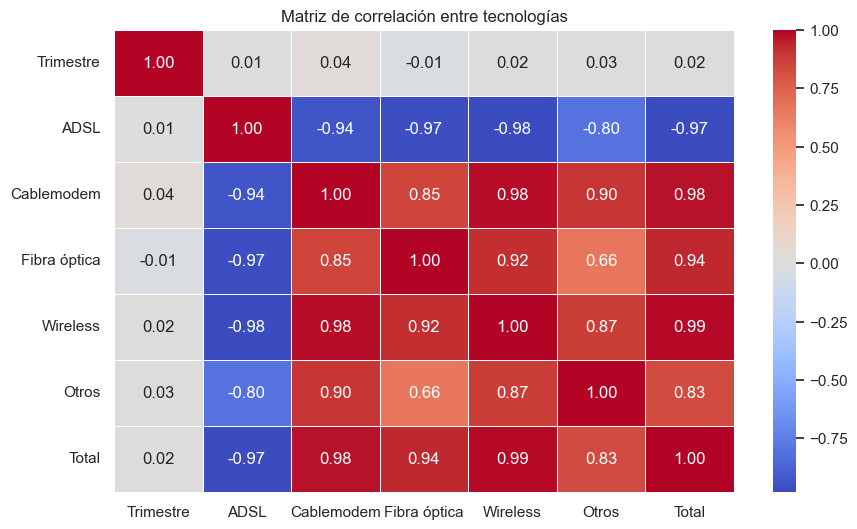

In [68]:



# Matriz de correlación entre tecnologías
plt.figure(figsize=(10, 6))
sns.heatmap(df_tecnologia.iloc[:, 1:-2].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de correlación entre tecnologías")
plt.show()



ADSL y Fibra óptica tienen una correlación negativa fuerte (cuando uno sube, el otro baja).
Cablemódem y Fibra óptica tienen una relación neutra, indicando que pueden coexistir sin desplazarse demasiado.
Wireless y Otros tienen poca relación con las demás tecnologías

C:\Users\yanin\AppData\Local\Temp\ipykernel_13352\4263237158.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  growth_rates = df_tecnologia.groupby("Año").sum().pct_change().mean() * 100
C:\Users\yanin\AppData\Local\Temp\ipykernel_13352\4263237158.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  growth_rates = df_tecnologia.groupby("Año").sum().pct_change().mean() * 100
C:\Users\yanin\AppData\Local\Temp\ipykernel_13352\4263237158.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign t

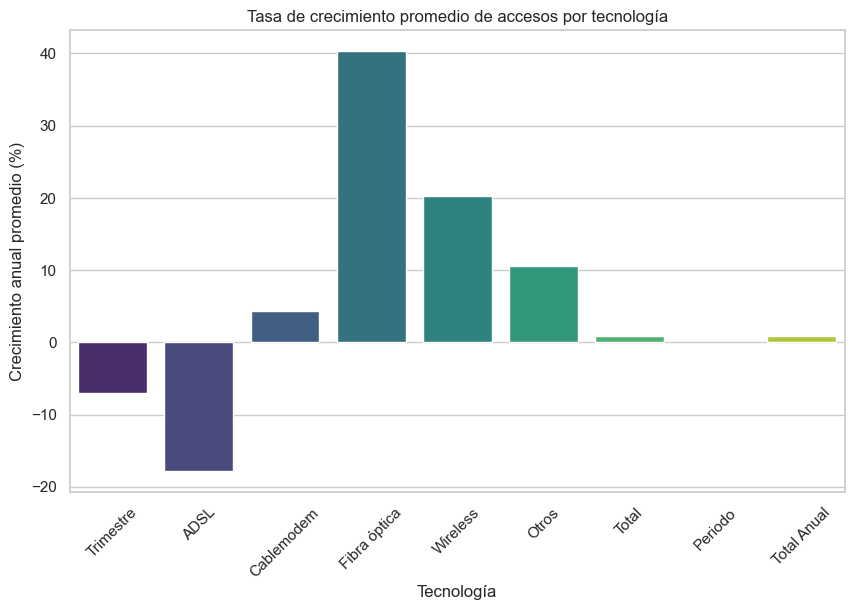

Trimestre       -7.000000
ADSL           -17.847217
Cablemodem       4.279556
Fibra óptica    40.317605
Wireless        20.315655
Otros           10.580758
Total            0.863914
Periodo               NaN
Total Anual      0.863913
dtype: float64

In [70]:
# Convertir todas las columnas excepto "Año" a tipo numérico, forzando errores a NaN
df_tecnologia.iloc[:, 1:] = df_tecnologia.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')

# Ahora hacer el cálculo de crecimiento anual
growth_rates = df_tecnologia.groupby("Año").sum().pct_change().mean() * 100

# Tendencia de crecimiento de cada tecnología (Promedio de crecimiento anual)
df_tecnologia["Total Anual"] = df_tecnologia.iloc[:, 1:-2].sum(axis=1)  # Sumar todas las tecnologías por año

# Calcular la tasa de crecimiento anual promedio de cada tecnología
growth_rates = df_tecnologia.groupby("Año").sum().pct_change().mean() * 100

# Visualización de la tasa de crecimiento
plt.figure(figsize=(10, 6))
sns.barplot(x=growth_rates.index, y=growth_rates.values, palette="viridis")
plt.title("Tasa de crecimiento promedio de accesos por tecnología")
plt.xlabel("Tecnología")
plt.ylabel("Crecimiento anual promedio (%)")
plt.xticks(rotation=45)
plt.show()

# Mostrar los valores de crecimiento
growth_rates


Tasa de Crecimiento Anual Promedio por Tecnología:
- Fibra óptica crece a una tasa promedio del 40.3% anual, lo que confirma su dominación en el mercado.
- Wireless también muestra un crecimiento significativo del 20.3%, posiblemente por zonas rurales o lugares sin acceso a fibra.
- Cablemódem crece de forma moderada (4.3% anual), manteniéndose estable.
- ADSL cae fuertemente a una tasa del -17.8% anual, lo que confirma su reemplazo por tecnologías más modernas.
- El total de accesos crece solo un 0.86% anual, lo que indica que el mercado está casi saturado y el crecimiento viene más por migración entre tecnologías que por nuevos usuarios.

-El sector está migrando agresivamente a fibra óptica y wireless, mientras que ADSL está desapareciendo. 

7-ingresos

In [82]:
# Cargar nuevamente el archivo y mostrar las primeras filas

df_ingresos = pd.read_excel(file_path, sheet_name="Ingresos ")
# Cargar la hoja "Penetracion-totales"

primeras_filas = df_ingresos.head()

# Cantidad de datos (filas y columnas)
cantidad_datos = df_ingresos.shape

primeras_filas, cantidad_datos


(    Año  Trimestre  Ingresos (miles de pesos)        Periodo
 0  2024          2               4.420322e+08   Abr-Jun 2024
 1  2024          1               3.461990e+08   Ene-Mar 2024
 2  2023          4               1.673760e+08   Oct-Dic 2023
 3  2023          3               1.331066e+08  Jul-Sept 2023
 4  2023          2               1.180603e+08   Jun-Mar 2023,
 (42, 4))

este datasep contiene 4 colunnas: Año ,Trimestre,Ingresos (miles de pesos)y Periodo

In [83]:
# Renombrar las columnas para evitar problemas con espacios y caracteres especiales
df_ingresos.rename(columns={
    "Año": "anio",
    "Trimestre": "trimestre",
    "Ingresos (miles de pesos)": "ingresos_miles",
    "Periodo": "periodo"
}, inplace=True)

# Verificar el cambio
df_ingresos.head()


,anio,trimestre,ingresos_miles,periodo
0,2024,2,4.420322e+08,Abr-Jun 2024
1,2024,1,3.461990e+08,Ene-Mar 2024
2,2023,4,1.673760e+08,Oct-Dic 2023
3,2023,3,1.331066e+08,Jul-Sept 2023
4,2023,2,1.180603e+08,Jun-Mar 2023


In [84]:
# Información general del DataFrame
info_df = df_ingresos.info()

# Verificar valores nulos
missing_values = df_ingresos.isnull().sum()

# Estadísticas descriptivas
descriptive_stats = df_ingresos.describe()

info_df, missing_values, descriptive_stats


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   anio            42 non-null     int64  
 1   trimestre       42 non-null     int64  
 2   ingresos_miles  42 non-null     float64
 3   periodo         42 non-null     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 1.4+ KB


(None,
 anio              0
 trimestre         0
 ingresos_miles    0
 periodo           0
 dtype: int64,
               anio  trimestre  ingresos_miles
 count    42.000000  42.000000    4.200000e+01
 mean   2019.000000   2.452381    5.001648e+07
 std       3.728597   1.130560    8.710208e+07
 min    2014.000000   1.000000    2.984054e+06
 25%    2016.000000   1.250000    7.055326e+06
 50%    2019.000000   2.000000    2.047527e+07
 75%    2021.000000   3.000000    4.485090e+07
 max    2033.000000   4.000000    4.420322e+08)

-El DataFrame tiene 42 filas y 4 columnas.
-No hay valores nulos en ninguna columna.
Estadísticas Descriptivas:
*Mínimo: 2,984,054 pesos.
*Máximo: 442,032,200 pesos.
*Media: Aproximadamente 50 millones de pesos.
*Desviación estándar: Alta, lo que indica variabilidad en los ingresos.



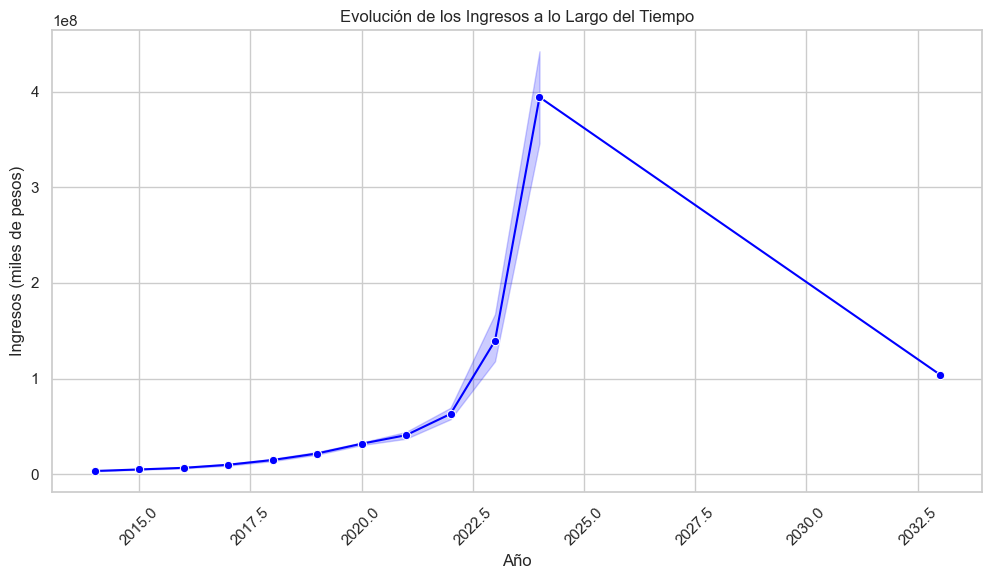

In [85]:
# Gráfico de tendencia de ingresos a lo largo del tiempo
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_ingresos, x="anio", y="ingresos_miles", marker="o", color="blue")
plt.title("Evolución de los Ingresos a lo Largo del Tiempo")
plt.xlabel("Año")
plt.ylabel("Ingresos (miles de pesos)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


el grafico muestra una tendencia  general de crecimiento positiva en los ingresos a lo largo del tiempo.con un crecimiento acelerado en 2017 a 2024

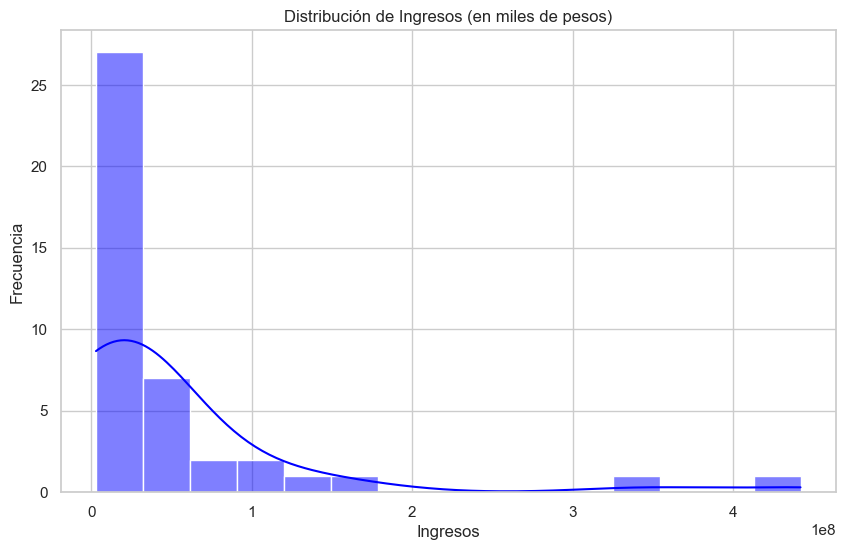

In [ ]:

# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Histograma de la distribución de ingresos
plt.figure(figsize=(10, 6))
sns.histplot(df_ingresos["ingresos_miles"], bins=15, kde=True, color="blue")
plt.title("Distribución de Ingresos (en miles de pesos)")
plt.xlabel("Ingresos")
plt.ylabel("Frecuencia")
plt.show()


Se observa que los ingresos varían ampliamente y que hay valores muy altos que podrían considerarse atípicos.

 In